# Demonstration and unit-testing `ri_ci` for Matlab

This file was tested on Matlab version 2019b, using the Jupyter `matlab_kernel`.

###  Matlab preliminaries

In [23]:
rng('default'); % set seed for replicability
pwd
addpath(pwd)


ans =

    'D:\GitHub\RI_CI\m'




In [15]:
%  Parameters of the simulation
N = 1000; % number of observations
R = 500 ; % number of alternative permutations of the treatment assignment to be used
tau = 1 ; % treatment effect

In [20]:
%  Generate data 
x = randn(N,1);
y0 = x + randn(N,1);
y1 = y0 + tau;
t = (rand(N,1) >= 0.5 ) ; % treatment status
y = y0 + t.*(y1 - y0) ; % switching regression
T0 = (rand(N,R) >= 0.5) ; % set of potential randomizations
DATA = array2table([y,t,x] , 'VariableNames',{'y','t','x'});

##  Testing specific sharp nulls

###  Testing null that $\tau_0 = 0$


lm = 


Linear regression model:
    y ~ 1 + t

Estimated Coefficients:
                    Estimate         SE         tStat         pValue  
                   ___________    ________    __________    __________

    (Intercept)    -0.00042488    0.062598    -0.0067875       0.99459
    t                   1.0733    0.088704          12.1    1.5205e-31


Number of observations: 1000, Error degrees of freedom: 998
Root Mean Squared Error: 1.4
R-squared: 0.128,  Adjusted R-Squared: 0.127
F-statistic vs. constant model: 146, p-value = 1.52e-31

ans =

    'The p-value from Randomization Inference for the hypothesis that tau = 0.00 is 0.00'




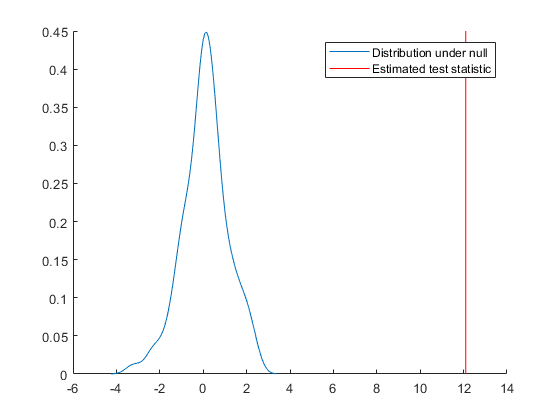

In [112]:
clear ri_ci
tau0 = 0;
[pval t1 t0] = ri_ci(DATA,{'y'},{'t'},tau0, T0, 100);
%scatter(y0,y0star) % confirm this recovers the true y0

figure(1)
clf
hax = axes;
hold on
ksdensity(t0) % distribution of test statistic under the null.
line([t1 t1],get(hax,'YLim'),'Color','red'); % [0 1])
legend('Distribution under null','Estimated test statistic')
hold off

###  Testing sharp nulls of non-zero treatment effects (e.g., $\tau_0=1$)

_Note:_  Model displays primary estimates that are the basis of analytic standard errors; p-values in that table correspond to test that $\tau_0=0$.


lm = 


Linear regression model:
    y ~ 1 + t

Estimated Coefficients:
                    Estimate         SE         tStat         pValue  
                   ___________    ________    __________    __________

    (Intercept)    -0.00042488    0.062598    -0.0067875       0.99459
    t                   1.0733    0.088704          12.1    1.5205e-31


Number of observations: 1000, Error degrees of freedom: 998
Root Mean Squared Error: 1.4
R-squared: 0.128,  Adjusted R-Squared: 0.127
F-statistic vs. constant model: 146, p-value = 1.52e-31

ans =

    'The p-value from Randomization Inference for the hypothesis that tau = 1.00 is 0.40'




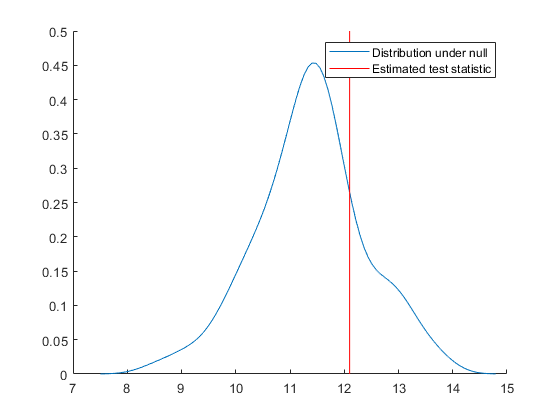

In [113]:
clear ri_ci
tau0 = 1;
[pval t1 t0] = ri_ci(DATA,{'y'},{'t'},tau0, T0, 100);
%scatter(y0,y0star) % confirm this recovers the true y0

figure(2)
clf
hax = axes;
hold on
ksdensity(t0) % distribution of test statistic under the null.
line([t1 t1],get(hax,'YLim'),'Color','red'); % [0 1])
legend('Distribution under null','Estimated test statistic')
hold off

## Finding 95% confidence interval

In [132]:
clear ri_ci
tau0 = 0;
%%%  PROBLEM HERE IS WITH THE 'RIGHTTAIL','LEFTTAIL' version of the p-values, I think.
%%%  Seemed to be working fine with two-sided tests. Check this!!!
[pval ,CI ,Q_UB, Q_LB ,~, ~] = ri_ci(DATA,{'y'},{'t'},tau0, T0, 100,'FindCI',true);


  File D:\GitHub\RI_CI\m\ri_ci.m, line 71, in ri_ci
Initial value for upper bound of CI not big enough.



Error: -1

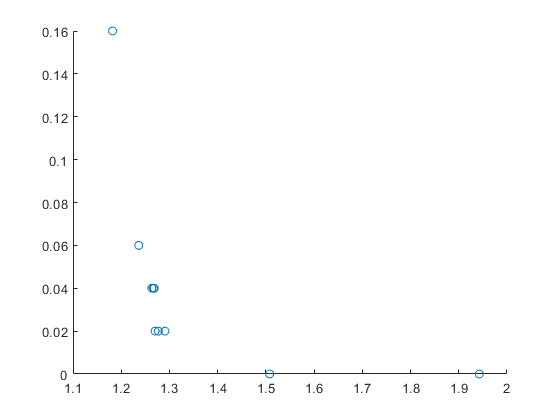

In [125]:
scatter(Q_UB(:,1),Q_UB(:,2))

In [126]:
Q_UB


Q_UB =

    1.9426         0
    1.5079         0
    1.2906    0.0200
    1.1819    0.1600
    1.2363    0.0600
    1.2634    0.0400
    1.2770    0.0200
    1.2702    0.0200
    1.2668    0.0400
    1.2685    0.0400


